## Install dependencies

In [1]:
!pip3 install torch pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Initiate Model

In [3]:
class Model(nn.Module):
    def __init__ (self, in_features = 4, h1=8, h2=9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [4]:
torch.manual_seed(41)
model = Model()

## Import dataframe

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [7]:
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

/var/folders/p4/7ht1p6vx2875xnlxz_dz25km0000gn/T/ipykernel_18177/986955548.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [8]:
X = df.drop('variety', axis=1)
y = df['variety']

In [9]:
X = X.values
y = y.values

## Splitting dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Training

In [14]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0:
        print(f'Epoch: {i}, loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, loss: 1.125203251838684
Epoch: 10, loss: 1.0097211599349976
Epoch: 20, loss: 0.8162347078323364
Epoch: 30, loss: 0.585993230342865
Epoch: 40, loss: 0.4003389775753021
Epoch: 50, loss: 0.26794716715812683
Epoch: 60, loss: 0.1796349734067917
Epoch: 70, loss: 0.12165626138448715
Epoch: 80, loss: 0.08606515824794769
Epoch: 90, loss: 0.06522617489099503


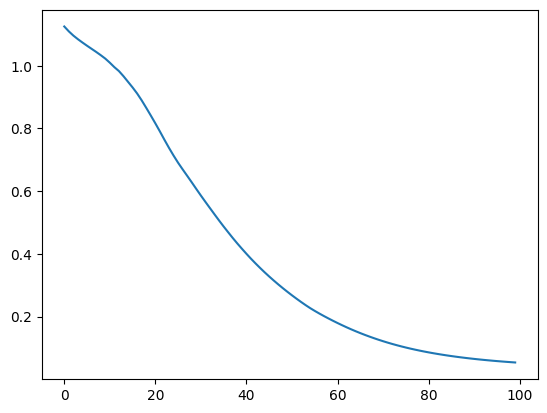

In [15]:
plt.plot(range(epochs), losses)

## Testing model

In [18]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
print(f'Loss: {loss}')

Loss: 0.13146093487739563


In [19]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # print(f'{i+1}: {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Correct: {correct}')

Correct: 28


## New datapoint

In [23]:
new_iris = torch.tensor([8.2, 5.3, 7.8, 2.1])

In [24]:
with torch.no_grad():
    print(model.forward(new_iris).argmax().item())

2


## Saving model

In [25]:
torch.save(model.state_dict(), 'simple-nn.pt')

## Loading model

In [26]:
new_model = Model()
model.load_state_dict(torch.load('simple-nn.pt'))

<All keys matched successfully>

In [27]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)